sketch_bgr  uint8


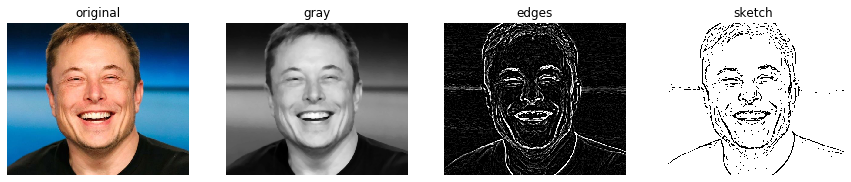

In [16]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

def sketchify(img, ksize=5):
    # Convert image to grayscale 
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
 
    # Apply median filter to the grayscale image 
    img_gray = cv2.medianBlur(img_gray, 7) 
 
    # Detect edges in the image and threshold it 
    edges = cv2.Laplacian(img_gray, cv2.CV_8U, ksize=ksize) 
    ret, sketch = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY_INV) 
 
    sketch_bgr = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)
    print('sketch_bgr ', sketch_bgr.dtype)
    
    # monitoring
    plt.figure(figsize=[15,10])
    plt.subplot(141); plt.imshow(img[...,::-1]); plt.title('original'); plt.axis('off')
    plt.subplot(142); plt.imshow(img_gray, cmap='gray'); plt.title('gray'); plt.axis('off')
    plt.subplot(143); plt.imshow(edges, cmap='gray'); plt.title('edges'); plt.axis('off')
    plt.subplot(144); plt.imshow(sketch_bgr[...,::-1]); plt.title('sketch'); plt.axis('off')
    
    return sketch_bgr

if __name__=='__main__': 
    img = cv2.imread('images/musk.jpg')
    sketch_bgr = sketchify(img)


sketch_bgr  uint8
img_bilateral : uint8 sketch_bgr : uint8
sketch_bgr. min, max 0 255
sketch_01. min, max 0.0 1.0
cartoon : float64 0.0 254.0
cartoon : uint8 0 254


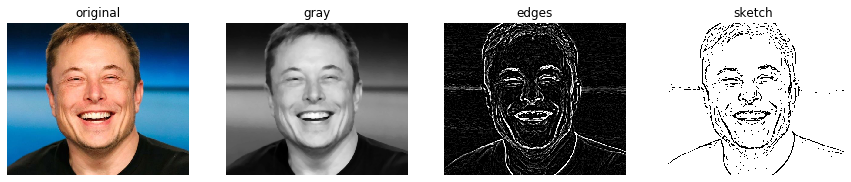

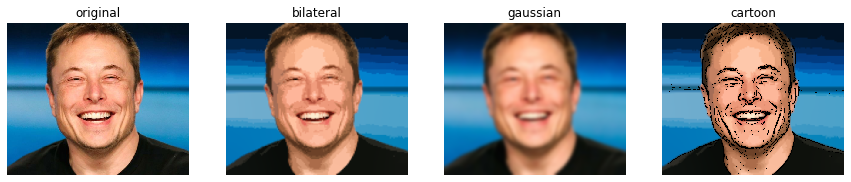

In [50]:
def cartoonize(img) :
    num_iter = 5 # bilateral filter 수행 횟수
    ds_factor = 4 # down_sampling factor. 속도빠른 연산 위해
    sigma_color = 10
    sigma_space = 8
    # Resize the image to a smaller size for faster computation 
    img_small = cv2.resize(img, None, fx=1.0/ds_factor, fy=1.0/ds_factor)
    for i in range(num_repetitions): # Apply bilateral filter the image multiple times 
        img_small = cv2.bilateralFilter(img_small, 0, sigma_color, sigma_space) 
    
    img_bilateral = cv2.resize(img_small, None, fx=ds_factor, fy=ds_factor) 

#    img_bilateral = cv2.bilateralFilter(img, 0, sigmaColor=100, sigmaSpace=30) 
    img_gaussian = cv2.GaussianBlur(img, (0,0), sigmaX=5)
     
    # Add the thick boundary lines to the image
    sketch_bgr = sketchify(img)
    print('img_bilateral :', img_bilateral.dtype, 'sketch_bgr :', sketch_bgr.dtype)
    print('sketch_bgr. min, max', np.amin(sketch_bgr), np.amax(sketch_bgr))
    sketch_01 = sketch_bgr / 255
    print('sketch_01. min, max', np.amin(sketch_01), np.amax(sketch_01))
    cartoon = img_bilateral * sketch_01
    print('cartoon :', cartoon.dtype, np.amin(cartoon), np.amax(cartoon))
    cartoon = cartoon.astype('uint8')
    print('cartoon :', cartoon.dtype, np.amin(cartoon), np.amax(cartoon))
    
    # monitoring
    plt.figure(figsize=[15,10])
    plt.subplot(141); plt.imshow(img[...,::-1]); plt.title('original'); plt.axis('off')
    plt.subplot(142); plt.imshow(img_bilateral[...,::-1]); plt.title('bilateral'); plt.axis('off')
    plt.subplot(143); plt.imshow(img_gaussian[...,::-1]); plt.title('gaussian'); plt.axis('off')
    plt.subplot(144); plt.imshow(cartoon[...,::-1]); plt.title('cartoon'); plt.axis('off')
    
    return cartoon 

if __name__=='__main__': 
    img = cv2.imread('images/musk.jpg')
    cartoon = cartoonize(img)
